[Resource](https://numpy.org/devdocs/user/quickstart.html)

# The Basics

NumPy's main object is the homogeneous multidimensional array. It's a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called *axes*.

For example, the array for the coordinates of a point in 3D space, `[1, 2, 1]`, has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.

```terminal
[[1., 0., 0.],
 [0., 1., 2.]]
 ```

 NumPy's array class is called `ndarray`. It is also known by the alias `array`. Note that `numpy.array` is not the same as the Standard Python Library class `array.array`, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an `ndarray` object are:

 **ndarray.ndim**

The number of axes (dimensions) of the array.

**ndarray.shape**

The dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with *n* rows and *m* columns, `shape` will be `(n,m)`. The length of the `shape` tuple is therefore the number of aces, `ndim`.

**ndarray.size**

The total number of elements of the array. This is equal to the product of the elements of `shape`.

**ndarray.dtype**

An object describing the type of the elements in the array. One can create or specify dtype's using standard Python types. Additionally, NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

**ndarray.itemsize**

The size in bytes of each element of the array. For example, an array of elements of type `float64` has `itemsixe` 8 (=64/8), while one of type `complex32` has `itemsize` 4 (=32/8). It's equivalent to `ndarray.dtype.itemsize`.

**ndarray.data**

The buffer containing the actual elements of the array. Normally, we won't need to use this attribute because we will access the elements in an array using indexing facilities.


In [1]:
import numpy as np

a = np.arange(15).reshape(3, 5)
print(f"`a`\n{a}\n")
print(f"Shape: {a.shape}")
print(f"Dimensions: {a.ndim}")
print(f"Data Type: {a.dtype.name}")
print(f"Size in bytes of each array element: {a.itemsize}")
print(f"Total number of elements of the array: {a.size}")
print(f"Type: {type(a)}\n")

b = np.array([6, 7, 8])
print(f"`b`\n{b}")
print(f"Type: {type(b)}")

`a`
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Shape: (3, 5)
Dimensions: 2
Data Type: int64
Size in bytes of each array element: 8
Total number of elements of the array: 15
Type: <class 'numpy.ndarray'>

`b`
[6 7 8]
Type: <class 'numpy.ndarray'>


# Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the `array` function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [2]:
a = np.array([2, 3, 4])
print(f"`a`\n{a}")
print(f"Data Type: {a.dtype}\n")

b = np.array([1.2, 3.5, 5.1])
print(f"`b`\n{b}")
print(f"Data Type: {b.dtype}")

`a`
[2 3 4]
Data Type: int64

`b`
[1.2 3.5 5.1]
Data Type: float64


A frequent error consists in calling `array` with multiple arguments, rather than providing a single sequence as an argument.

In [3]:
a = np.array(1, 2, 3, 4)

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [ ]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

`array` transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [ ]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

The type of the array can also be explicitly specified at creation time:

In [ ]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, as an expensive operation.

The function `zeros` creates an array full of zeros, the function `ones` creates an array full of ones, and the function `empty` creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array id `float64`, but it can be specified via the key word argument `dtype`.

In [ ]:
a = np.zeros((3, 4))
print(f"`a`\n{a}\n")

b = np.ones((2, 3, 4), dtype=np.int16)
print(f"`b`\n{b}\n")

c = np.empty((2, 3))
print(f"`c`\n{c}\n")

`a`
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

`b`
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]

`c`
[[0.51606859 0.11586561 0.62348976]
 [0.77668311 0.6130033  0.9172977 ]]



To create sequences of numbers, NumPy provides the `arange` function which is analogous to the Python built-in `range`, but returns an array.

In [ ]:
a = np.arange(10, 30, 5)
print(f"`a`\n{a}\n")

b = np.arange(0, 2, 0.3)
print(f"`b`\n{b}\n")

`a`
[10 15 20 25]

`b`
[0.  0.3 0.6 0.9 1.2 1.5 1.8]



When `arange` is used with floating point arguments, it's generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it's usually better to use the function `linspace` that receives as an argument the number of elements that we want, instead of the step:

In [ ]:
from numpy import pi

np.linspace(0, 2, 9) # 9 numbers from 0 to 2

x = np.linspace(0, 2 * pi, 100)
f = np.sin(x)

print(f"`x`\n{x}\n")
print(f"`f`\n{f}")

`x`
[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.64

# Printing Arrays

When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:

- The last axis is printed from left to right,
- The second-to-last is printed from top to bottom,
- the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [ ]:
a = np.arange(6) # 1d array
print(f"`a`\n{a}\n")

b = np.arange(12).reshape(4, 3) # 2d array
print(f"`b`\n{b}\n")

c = np.arange(24).reshape(2, 3, 4) # 3d array
print(f"`c`\n{c}\n")

`a`
[0 1 2 3 4 5]

`b`
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

`c`
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]



If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:

In [ ]:
print(np.arange(10000), "\n")

print(np.arange(10000).reshape(100, 100))

[   0    1    2 ... 9997 9998 9999] 

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


To disable this behaviour and force NumPy to print the entire array, you can change the printing options using `set_printoptions`.

In [ ]:
import sys

#np.set_printoptions(threshold=sys.maxsize)  # sys module should be imported

# Basic Operations

Arithmetic operators on arrays apply *elementwise*. A new array is created and filled with the result.

In [ ]:
a = np.array([20, 30, 40, 50])
print(f"Array `a`:\n{a}\n")

b = np.arange(4)
print(f"Array `b`:\n{b}\n")

c = a - b
print(f"Array `c`:\n{c}\n")

print(f"Array `b` squared:\n{b**2}\n")

print(f"Array 10 * sin(a):\n{10 * np.sin(a)}\n")

print(f"Array `a` < 35:\n{a < 35}")

Array `a`:
[20 30 40 50]

Array `b`:
[0 1 2 3]

Array `c`:
[20 29 38 47]

Array `b` squared:
[0 1 4 9]

Array 10 * sin(a):
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]

Array `a` < 35:
[ True  True False False]


Unlike in many matrix languages, the product operator `*` operates elementwise in NumPy arrays. The matrix product can be performed using the `@` operator (in python >= 3.5) or the `dot` function or method:

In [ ]:
a = np.array([[1, 1],
              [0, 1]])
print(f"`a`\n{a}\n")

b = np.array([[2, 0],
              [3, 4]])
print(f"`b`\n{b}\n")

# Elementwise product
print(f"a * b\n{a * b}\n")

# Matrix product
print(f"a @ b\n{a @ b}\n")

# Another matrix product
print(f"a.dot(b)\n{a.dot(b)}")

`a`
[[1 1]
 [0 1]]

`b`
[[2 0]
 [3 4]]

a * b
[[2 0]
 [0 4]]

a @ b
[[5 4]
 [3 4]]

a.dot(b)
[[5 4]
 [3 4]]


Some operations, such as `+=` and `*=`, act in place to modify an existing array rather than create a new one.

In [ ]:
rg = np.random.default_rng(1) # Creates an instance of default random number generator
print(f"`rg`\n{rg}\n")

a = np.ones((2, 3), dtype=int)
print(f"`a`\n{a}\n")

b = rg.random((2, 3))
print(f"`b`\n{b}\n")

b += a
print(f"b += a\n{b}")

#a += b # b is not automatically converted to integer type

`rg`
Generator(PCG64)

`a`
[[1 1 1]
 [1 1 1]]

`b`
[[0.51182162 0.9504637  0.14415961]
 [0.94864945 0.31183145 0.42332645]]

b += a
[[1.51182162 1.9504637  1.14415961]
 [1.94864945 1.31183145 1.42332645]]


When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as **upcasting**)

In [ ]:
a = np.ones(3, dtype=np.int32)
print(f"`a`\n{a}\n")

b = np.linspace(0, pi, 3)
print(f"`b`\n{b}")
print(f"Data Type: {b.dtype.name}\n")

c = a + b
print(f"`c`\n{c}")
print(f"Data Type: {c.dtype.name}\n")

d = np.exp(c * 1j)
print(f"`d`\n{d}")
print(f"Data Type: {d.dtype.name}")

`a`
[1 1 1]

`b`
[0.         1.57079633 3.14159265]
Data Type: float64

`c`
[1.         2.57079633 4.14159265]
Data Type: float64

`d`
[ 0.54030231+0.84147098j -0.84147098+0.54030231j -0.54030231-0.84147098j]
Data Type: complex128


Many unary operations, such as computing the sun of all the elements in the array, are implemented as methods of the `ndarray` class.

In [ ]:
a = rg.random((2, 3))
print(f"`a`:\n{a}\n")
print(f"Sum: {a.sum()}")
print(f"Min: {a.min()}")
print(f"Max: {a.max()}")

`a`:
[[0.51606859 0.11586561 0.62348976]
 [0.77668311 0.6130033  0.9172977 ]]

Sum: 3.5624080737423904
Min: 0.11586561247077032
Max: 0.9172977047909027


By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the `axis` parameter you can apply an operation along the specified axis of an array:

In [ ]:
b = np.arange(12).reshape(3, 4)
print(f"`b`\n{b}\n")

print(f"Sum of each column: {b.sum(axis=0)}")
print(f"Min of each row:{b.min(axis=1)}")
print(f"Cumulative sum along each row:\n{b.cumsum(axis=1)}")

`b`
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Sum of each column: [12 15 18 21]
Min of each row:[0 4 8]
Cumulative sum along each row:
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


# Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called "universal functions" (`ufunc`). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [ ]:
b = np.arange(3)
print(f"`b`:\n{b}\n")
print(f"np.exp(b)\n{np.exp(b)}\n")
print(f"np.sqrt(b)\n{np.sqrt(b)}\n")

c = np.array([2., -1., 4.])
print(f"`c`\n{c}\n")
print(f"np.add(b, c)\n{np.add(b, c)}")

`b`:
[0 1 2]

np.exp(b)
[1.         2.71828183 7.3890561 ]

np.sqrt(b)
[0.         1.         1.41421356]

`c`
[ 2. -1.  4.]

np.add(b, c)
[2. 0. 6.]


# Indexing, Slicing, and Iterating

**One-dimensional** arrays can be indexed, sliced, and iterated over, much like lists and other Python sequences.

In [ ]:
a = np.arange(10)**3
print(f"`a`\n{a}\n")
print(f"a[2]: {a[2]}")
print(f"a[2:5]: {a[2:5]}")

# Equivalent to a[0:6:2] = 1000;
# from start to position 6, exclusive, set every 2nd element to 1000
a[:6:2] = 1000
print(f"a[:6:2] = 1000: {a}\n")

# Reversed `a`
a[::-1]
print(f"Reversed `a`\n{a}\n")

print("Looping through `a`")
for i in a:
    print(i**(1 / 3.))

`a`
[  0   1   8  27  64 125 216 343 512 729]

a[2]: 8
a[2:5]: [ 8 27 64]
a[:6:2] = 1000: [1000    1 1000   27 1000  125  216  343  512  729]

Reversed `a`
[1000    1 1000   27 1000  125  216  343  512  729]

Looping through `a`
9.999999999999998
1.0
9.999999999999998
3.0
9.999999999999998
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


**Multidimensional** arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [ ]:
def f(x, y):
    return 10 * x + y

b = np.fromfunction(f, (5, 4), dtype=int)
print(f"`b`\n{b}\n")

print(f"b[2, 3]: {b[2, 3]}\n")
print(f"b[0:5, 1]: {b[0:5, 1]}\n") # Each row in the second column of b
b[:, 1] # Equivalent to the previous example
print(f"b[1:3, :]\n{b[1:3, :]}") # Each column in the second and third row of b

`b`
[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]

b[2, 3]: 23

b[0:5, 1]: [ 1 11 21 31 41]

b[1:3, :]
[[10 11 12 13]
 [20 21 22 23]]


When fewer indices are provided than the number of axes, the missing indices are considered complete slices`:`

In [ ]:
b[-1]

array([40, 41, 42, 43])

The expression within brackets in `b[i]` is treated as an `i` followed by as many instances of `:` as needed to represent the remaining axes. NumPy also allows you to write this using dots as `b[i, ...]`.

The **dots**(`...`) represent as many colons as needed to produce a complete indexing tuple. For example, if `x` is an array with 5 axes, then

- `x[1, 2, ...]` is equivalent to `x[1, 2, :, :, :]`,
- `x[..., 3]` to `x[:, :, :, :, 3] and
- `x[4, ..., 5]` to `x[4, :, :, 5, :]`.

In [ ]:
c = np.array([[[  0,  1,  2],  # a 3D array (two stacked 2D arrays)
               [ 10, 12, 13]],
              [[100, 101, 102],
               [110, 112, 113]]])

print(f"`c` shape: {c.shape}\n")
print(f"c[1, ...]\n{c[1, ...]}\n") # same as c[1, :, :] or c[1]
print(f"c[..., 2]\n{c[..., 2]}") # same as c[:, :, 2]

`c` shape: (2, 2, 3)

c[1, ...]
[[100 101 102]
 [110 112 113]]

c[..., 2]
[[  2  13]
 [102 113]]


**Iterating** over multidimensional arrays is done with respect to the first axis:

In [ ]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


However, if one wants to perform an operation on each element in the array, one can use the `flat` attribute which is an iterator over all the elements of the array:

In [ ]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


# Shape Manipulation

## Changing the shape of an array

An array has a shape given by the number of elements along each axis:

In [ ]:
a = np.floor(10 * rg.random((3, 4)))
print(f"`a`\n{a}\n")
print(f"Shape: {a.shape}")

`a`
[[2. 2. 7. 2.]
 [4. 9. 9. 7.]
 [5. 2. 1. 9.]]

Shape: (3, 4)


The shape of an array can be changed with various commands. Note that the following three commands all return a modified array, but do not change the original array:

In [ ]:
print(f"`a` original\n{a}\n")

print(f"`a` flattened\n{a.ravel()}\n") # Returns the array flattened

print(f"`a` reshaped\n{a.reshape(6, 2)}\n")

print(f"`a` transposed\n{a.T}")

`a` original
[[2. 2. 7. 2.]
 [4. 9. 9. 7.]
 [5. 2. 1. 9.]]

`a` flattened
[2. 2. 7. 2. 4. 9. 9. 7. 5. 2. 1. 9.]

`a` reshaped
[[2. 2.]
 [7. 2.]
 [4. 9.]
 [9. 7.]
 [5. 2.]
 [1. 9.]]

`a` transposed
[[2. 4. 5.]
 [2. 9. 2.]
 [7. 9. 1.]
 [2. 7. 9.]]


The order of the elements in the array resulting from `ravel` is normally "C-style", that is, the rightmost index "changes the fastest", so the element after `a[0, 0]` is `a[0, 1]`. If the array is reshaped to some other shape, again the array is treated as "C-style". NumPy normally creates arrays stored in this order, so `ravel` will usually not need to copy its argument, but if the array was made by taking slices of another array or created with unusual options, it may need to be copied. The functions `ravel` and `reshape` can also be instructed, using an optional argument, to use FORTRAN-style arrays, in which the leftmost index changes the fastest.

The `reshape` function returns its argument with a modified shape, whereas the `ndarray.resize` method modifies the array itself:

In [ ]:
print(f"`a`\n{a}\n")

a.resize((2, 6))
print(f"`a` resized\n{a}")

`a`
[[2. 2. 7. 2.]
 [4. 9. 9. 7.]
 [5. 2. 1. 9.]]

`a` resized
[[2. 2. 7. 2. 4. 9.]
 [9. 7. 5. 2. 1. 9.]]


If a dimension is given as `-1` in a reshaping operation, the other dimensions are automatically calculated:

In [ ]:
a.reshape(3, -1)

array([[2., 2., 7., 2.],
       [4., 9., 9., 7.],
       [5., 2., 1., 9.]])

# Stacking Together Different Arrays

Several arrays can be stacked together along different axes:

In [ ]:
a = np.floor(10 * rg.random((2, 2)))
print(f"`a`\n{a}\n")

b = np.floor(10 * rg.random((2, 2)))
print(f"`b`\n{b}\n")

print(f"`a` and `b` vertically stacked\n{np.vstack((a, b))}\n")

print(f"`a` and `b` horizontally stacked\n{np.hstack((a, b))}\n")

`a`
[[8. 4.]
 [2. 0.]]

`b`
[[6. 7.]
 [8. 2.]]

`a` and `b` vertically stacked
[[8. 4.]
 [2. 0.]
 [6. 7.]
 [8. 2.]]

`a` and `b` horizontally stacked
[[8. 4. 6. 7.]
 [2. 0. 8. 2.]]



The function `column_stack` stacks 1D arrays as columns into a 2D array. It's equivalent to `hstack` only for 2D arrays:

**Note**: `row_stack` is depreciated.

In [ ]:
from numpy import newaxis

a = np.array([4., 2.])
b = np.array([3., 8.])

c_stack = np.column_stack((a, b)) # Returns a 2D array
h_stack = np.hstack((a, b)) # The result is different

print(f"`a`\n{a}\n")
print(f"`b`\n{b}\n")

print(f"`a` and `b` with column_stack\n{c_stack}\n")
print(f"`a` and `b` with hstack\n{h_stack}\n")

a[:, newaxis] # View `a` as a 2D column vector

np.column_stack((a[:, newaxis], b[:, newaxis])) # The result is the same as column_stack

`a`
[4. 2.]

`b`
[3. 8.]

`a` and `b` with column_stack
[[4. 3.]
 [2. 8.]]

`a` and `b` with hstack
[4. 2. 3. 8.]



array([[4., 3.],
       [2., 8.]])

In general, for arrays with more than two dimensions, `hstack` stacks along their second axes, `vstack` stacks along their first axes, and `concatenate` allows for optional arguments giving the number of the axis along which the concatenation should happen.

**Note**

In complex cases, `r_` and `c_` are useful for creating arrays by stacking numbers along one axis. They allow the use of range literals `:`.

In [ ]:
np.r_[1:4, 0, 4]

array([1, 2, 3, 0, 4])

When used with arrays as arguments, `r_` and `c_` are similar to `vstack` and `hstack` in their default behavior, but allow for an optional argument giving the number of the axis along which to concatenate.

# Splitting one array into several smaller ones

Using `hsplit`, you can split an array along its horizontal axis, either by specifying the number of equally shaped arrays to return, or by specifying the columns after which the division should occur:

In [ ]:
a = np.floor(10 * rg.random((2, 12)))
print(f"`a`\n{a}\n")

# Split `a` into 3
a_split = np.hsplit(a, 3)
print(f"`a` with hsplit\n{a_split}\n")

# Split `a` after the third and fourth column
a_split2 = np.hsplit(a, (3, 4))
print(f"`a` split after the third and fourth column\n{a_split2}")


`a`
[[2. 5. 8. 2. 2. 8. 7. 1. 8. 8. 1. 6.]
 [1. 2. 4. 5. 4. 5. 2. 7. 2. 9. 5. 3.]]

`a` with hsplit
[array([[2., 5., 8., 2.],
       [1., 2., 4., 5.]]), array([[2., 8., 7., 1.],
       [4., 5., 2., 7.]]), array([[8., 8., 1., 6.],
       [2., 9., 5., 3.]])]

`a` split after the third and fourth column
[array([[2., 5., 8.],
       [1., 2., 4.]]), array([[2.],
       [5.]]), array([[2., 8., 7., 1., 8., 8., 1., 6.],
       [4., 5., 2., 7., 2., 9., 5., 3.]])]


`vsplit` splits along the vertical axis, and `array_split` allows one to specify along which axis to split.

# Copies and Views

When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:

## No copy at all

Simple assignments make no copy of objects or their data.

In [ ]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])

b = a # No new object is created
b is a # `a` and `b` are two names for the same ndarray object

True

Python passes mutable objects as references, so function calls make no copy.

In [ ]:
def f(x):
    print(id(x))

id(a) # id is a unique identifier of an object

4652844304

## View or shallow copy

Different array objects can share the same data. The `view` method creates a new array object that looks at the same data.

In [ ]:
c = a.view()
print(f"Does `c` share data with `a`?: {c is a}")
print(f"Is `c` a view of the data owned by `a`?: {c.base is a}")
print(f"Does `c` own its data?: {c.flags.owndata}\n")

c = c.reshape((2, 6)) # `a`'s shape doesn't change, reassigned `c` is still a view of `a`
c[0, 4] = 1234 # `a`'s data changes

print(f"Display of changing `c` to affect `a`\n{a}")

Does `c` share data with `a`?: False
Is `c` a view of the data owned by `a`?: True
Does `c` own its data?: False

Display of changing `c` to affect `a`
[[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]]


Slicing an array returns a view of it:

In [ ]:
s = a[:, 1:3]
s[:] = 10 # s[:] is a view of s. Note the difference between s = 10 and s[:] = 10
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

## Deep copy

The `copy` method makes a complete copy of the array and its data.

In [ ]:
d = a.copy()
print(f"Does `d` share data with `a`?: {d is a}")
d.base is a

Does `d` share data with `a`?: False


False

Sometimes `copy` should be called after slicing if the original array is not required anymore. For example, suppose `a` is a huge intermediate result and the final result `b` only contains a small fraction of `a`, a deep copy should be made when constructing `b` with slicing:

In [ ]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a # The memory of `a` can be released

If `b = a[:100]` is used instead, `a` is referenced by `b` and will persist in memory even if `del a` is executed.

# Functions and Methods Overview

[Here](https://numpy.org/devdocs/reference/routines.html#routines) is a list of some useful NumPy functions and methods names ordered in categories

# Less Basic

## Broadcasting rules

Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.

The first rule of broadcasting is that if all input arrays do not have the same number of dimensions, a "1" will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

The second rule of broadcasting ensures that arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the "broadcast" array.

After application of the broadcasting rules, the sizes of all arrays must match.

# Advanced Indexing and Index Tricks

NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.

## Indexing with arrays of indices

In [ ]:
a = np.arange(12)**2 # The first 12 square numbers
i = np.array([1, 1, 3, 8, 5]) # An array of indices

print(f"`a`\n{a}\n")
print(f"`i`\n{i}\n")
print(f"a[i]\n{a[i]}\n") # The elements of `a` at the positions `i`

j = np.array([[3, 4], [9, 7]]) # A bidimensional array of indices
print(f"`j`\n{j}\n")

print(f"a[j]\n{a[j]}") # The same shape as `j`

`a`
[  0   1   4   9  16  25  36  49  64  81 100 121]

`i`
[1 1 3 8 5]

a[i]
[ 1  1  9 64 25]

`j`
[[3 4]
 [9 7]]

a[j]
[[ 9 16]
 [81 49]]


When the indexed array `a` is multidimensional, a single array of indices refers to the first dimension of `a`. The following example shows this behavior by converting an image of labels into a color image using a palette.

In [ ]:
palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white
image = np.array([[0, 1, 2, 0],  # each value corresponds to a color in the palette
                  [0, 3, 4, 0]])

palette[image] # The (2, 4, 3) color image

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

We can also give indices for more than one dimension. The arrays of indices for each dimension ust have the same shape.

In [ ]:
a = np.arange(12).reshape(3, 4)
print(f"`a`\n{a}\n")

i = np.array([[0, 1],
              [1, 2]])

j = np.array([[2, 1],
              [3, 3]])

print(f"a[i, j]\n{a[i, j]}\n")

print(f"a[i, 2]\n{a[i, 2]}\n")

print(f"a[:, j]\n{a[i, j]}")

`a`
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

a[i, j]
[[ 2  5]
 [ 7 11]]

a[i, 2]
[[ 2  6]
 [ 6 10]]

a[:, j]
[[ 2  5]
 [ 7 11]]


* `i[0,0], j[0,0]` → `(0, 2)` → `a[0, 2]` → `2`
* `i[0,1], j[0,1]` → `(1, 1)` → `a[1, 1]` → `5`
* `i[1,0], j[1,0]` → `(1, 3)` → `a[1, 3]` → `7`
* `i[1,1], j[1,1]` → `(2, 3)` → `a[2, 3]` → `11`

In Python, `arr[i, j]` is exactly the same as `arr[(i, j)]`, so we can put `i` and `j` in a `tuple` and then do the indexing with that.

In [ ]:
l = (i, j)
a[l] # Equivalent to a[i, j]

array([[ 2,  5],
       [ 7, 11]])

However, we can not do this by putting `i` and `j` into an array, because this array will be interpreted as indexing the first dimension of `a`.

In [ ]:
s = np.array([i, j]) # Not what we want
print(a[tuple(s)]) # This works though
a[s]

[[ 2  5]
 [ 7 11]]


IndexError: index 3 is out of bounds for axis 0 with size 3

Another common use of indexing with arrays is the search of the maximum value of time-dependent series:

In [ ]:
time = np.linspace(20, 145, 5) # Time scale
data = np.sin(np.arange(20)).reshape(5, 4) # 4 time-dependent series

print(f"`time`\n{time}\n")
print(f"`data`\n{data}\n")

# Index of the maxima for each series
ind = data.argmax(axis=0)
print(f"`ind`\n{ind}\n")

data_max = data[ind, range(data.shape[1])]
print(f"`data_max`\n{data_max}\n")

time_max = time[ind]
print(f"`time_max`\n{time_max}\n")

np.all(data_max == data.max(axis=0))

`time`
[ 20.    51.25  82.5  113.75 145.  ]

`data`
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]

`ind`
[2 0 3 1]

`data_max`
[0.98935825 0.84147098 0.99060736 0.6569866 ]

`time_max`
[ 82.5   20.   113.75  51.25]



np.True_

You can also use indexing with arrays as a target to assign to:

In [ ]:
a = np.arange(5)
print(f"`a`\n{a}")

a[[1, 3, 4]] = 0
a

`a`
[0 1 2 3 4]


array([0, 0, 2, 0, 0])

However, when the list of indices contains repetitions, the assignment is done several times, leaving behind the last value:

In [ ]:
a = np.arange(5)
a[[0, 0, 2]] = [1, 2, 3]
a

array([2, 1, 3, 3, 4])

This is reasonable enough, but watch out if you want to use Python's `+=` construct, as it may not do what you expect:

In [ ]:
a = np.arange(5)
a[[0, 0, 2]] += 1
a

Even though 0 occurs twice in the list of indices, the 0th element is only incremented once. This is because Python requires `a += 1` to be equivalent to `a = a + 1`,.

## Indexing with boolean arrays

When we index arrays with arrays of (integer) indices, we are providing th list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don't.

The most natural way one can think of for boolean indexing is to use boolean arrays that have *the same shape* as the original array:

In [ ]:
a = np.arange(12).reshape(3, 4)
print(f"`a`\n{a}\n")

b = a > 4
print(f"`b`\n{b}\n")

print(f"a[b]\n{a[b]}") # 1D array with the selected elements (the values, not the indices)

`a`
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

`b`
[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]

a[b]
[ 5  6  7  8  9 10 11]


This property can be very useful in assignments:

In [ ]:
a[b] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

You can look at the following example to see how to use boolean indexing to generate an image of the Mandelbrot set:

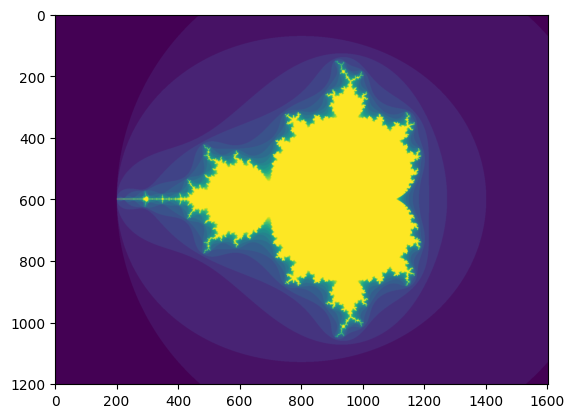

In [7]:
import matplotlib.pyplot as plt

def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)"""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r
        div_now = diverge & (divtime == maxit)
        divtime[div_now] = i
        z[diverge] = r

    return divtime

plt.clf()
plt.imshow(mandelbrot(400, 400))


The second way of indexing with booleans is more similar to integer indexing; for each dimension of the array we give a 1D boolean array selecting the slices we want:

In [11]:
a = np.arange(12).reshape(3, 4)
print(f"`a`\n{a}\n")

b1 = np.array([False, True, True]) # First dim selection
b2 = np.array([True, False, True, False]) # Second dim selection

print(f"a[b1, :]\n{a[b1, :]}\n") # Selecting rows
a[b1] # Same thing

print(f"a[:, b2]\n{a[:, b2]}\n")

print(f"a[b1, b2]\n{a[b1, b2]}") # A weird thing to do

`a`
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

a[b1, :]
[[ 4  5  6  7]
 [ 8  9 10 11]]

a[:, b2]
[[ 0  2]
 [ 4  6]
 [ 8 10]]

a[b1, b2]
[ 4 10]


Not that the length of the 1D boolean array must coincide with the length of the dimension (or axis) you want to slice. In the previous example, `b1` has length 3 (the number of *rows* in `a`), and `b2` (of length 4) is suitable to index the 2nd axis (columns) of `a`.

# The ix_() Function

The `ix_` function can be used to combine different vectors so as to obtain the result for each n-uplet. For example, if you want to compute all the a+b*x for all the triplets taken from each of the vectors a, b, and c:

**Note:** "N-uplet" is mathematical terminology meaning "a sequence of n elements" - it's the generalized form of tuple, triple, quadruple, etc.:

In [ ]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])

ax, bx, cx = np.ix_(a, b, c)

print(f"`ax`\n{ax}\nShape: {ax.shape}\n")
print(f"`ax`\n{bx}\nShape: {bx.shape}\n")
print(f"`ax`\n{cx}\nShape: {cx.shape}\n")

result = ax + bx * cx
print(f"Result:\n{result}")

`ax`
[[[2]]

 [[3]]

 [[4]]

 [[5]]]
Shape: (4, 1, 1)

`ax`
[[[8]
  [5]
  [4]]]
Shape: (1, 3, 1)

`ax`
[[[5 4 6 8 3]]]
Shape: (1, 1, 5)

Result:
[[[42 34 50 66 26]
  [27 22 32 42 17]
  [22 18 26 34 14]]

 [[43 35 51 67 27]
  [28 23 33 43 18]
  [23 19 27 35 15]]

 [[44 36 52 68 28]
  [29 24 34 44 19]
  [24 20 28 36 16]]

 [[45 37 53 69 29]
  [30 25 35 45 20]
  [25 21 29 37 17]]]


Essentially, the `ix_` function reshapes the data in a way that it can be computed with a function to produce every possible combination of that function's computation.

Let's break down how the reshaping from the `ix_` function is working before moving on:

In [ ]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])

print("Original:")
print(f"`a` Shape: {a.shape} - 4 elements")
print(f"`b` Shape: {b.shape} - 3 elements")
print(f"`c` Shape: {c.shape} - 4 elements\n")

print("The assignment order for `ax`, `bx`, and `cx` determines\nwhich dimension each array controls:\n")

print("After ix_:")
ax, bx, cx = np.ix_(a, b, c)
print(f"`ax` Shape: {ax.shape} - controls dimension 0")
print(f"`bx` Shape: {bx.shape} - controls dimension 1")
print(f"`cx` Shape: {cx.shape} - controls dimension 2")

Original:
`a` Shape: (4,) - 4 elements
`b` Shape: (3,) - 3 elements
`c` Shape: (5,) - 4 elements

The assignment order for `ax`, `bx`, and `cx` determines
which dimension each array controls:

After ix_:
`ax` Shape: (4, 1, 1) - controls dimension 0
`bx` Shape: (1, 3, 1) - controls dimension 1
`cx` Shape: (1, 1, 5) - controls dimension 2


You could also implement the reduce as follows:

In [ ]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r, v)
    return r

and then use it as:

In [37]:
ufunc_reduce(np.add, a, b, c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

The advantage of this version ofd reduce compared to the normal ufunc.reduce is that it makes use of the broadcasting rules in order to avoid creating an argument array the size of the output times the number of vectors.

# Tricks and Tips

Here we give a list of short and useful tips.

## "Automatic" reshaping

To change the dimensions of an array, you can omit one of the sizes which will then be deduced automatically:

In [ ]:
a = np.arange(30)
print(f"`a`\n{a}")
print(f"Shape: {a.shape}\n")

b = a.reshape((2, -1, 3)) # -1 means "whatever is needed"
print(f"`b`\n{b}")
print(f"Shape: {b.shape}\n")

`a`
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Shape: (30,)

`b`
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]]
Shape: (2, 5, 3)



## Vector stacking

How do we construct a 2D array from a list of equally-sized row vectors? In MATLAB this is quite easy: if `x` and `y` are two vectors of the same length you only need fo `m=[x;y]`. In NumPy this works via the functions `column_stack`, `dstack`, `hstack`, and `vstack`, depending on the dimension in which the stacking is to be done For example:

In [40]:
x = np.arange(0, 10, 2)
print(f"`x`\n{x}\n")

y = np.arange(5)
print(f"`y`\n{y}\n")

m = np.vstack([x, y])
print(f"`m`\n{m}\n")

xy = np.hstack([x, y])
print(f"`xy`\n{xy}")


`x`
[0 2 4 6 8]

`y`
[0 1 2 3 4]

`m`
[[0 2 4 6 8]
 [0 1 2 3 4]]

`xy`
[0 2 4 6 8 0 1 2 3 4]


The logic behind those functions in more than two dimensions can be strange.

## Histograms

The NumPy `histogram` function applied to an array returns a pair of vectors: the histogram of the array and a vector of the bin edges. Beware: `matplotlib` also has a function to build histograms (called `hist`, as in Matlab) that differs from the one in NumPy. The main difference is that `pylab.hist` plots the histogram automatically, while `numpy.histogram` only generates the data.

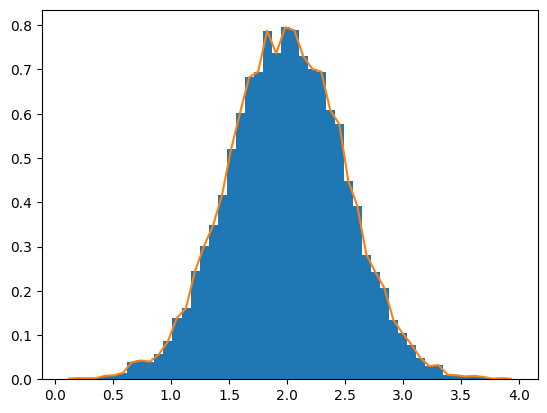

In [42]:
import matplotlib.pyplot as plt

rg = np.random.default_rng(1)

# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=True)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True) # NumPy version (no plot)
plt.plot(.5 * (bins[1:] + bins[:-1]), n)